## Introduction

The Breast Cancer dataset is a widely used dataset for binary classification. It contains features computed from digitized images of breast masses, including metrics like radius, texture, smoothness, compactness, etc. The target variable indicates whether the tumor is malignant or benign.

In this mini project, we aim to build a Logistic Regression model to classify tumors as malignant or benign. The project demonstrates a beginner-friendly, end-to-end workflow, including data loading, train-test splitting, model training, evaluation, and interpretation of feature importance.

In [35]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,6)

# Loading datasets 


In [52]:
data = load_breast_cancer()


# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add target column
df['target'] = data.target
df['target_name'] = df['target'].map({0: 'Malignant', 1: 'Benign'})

# Now you can describe the dataset
print(df.describe())

       mean radius  mean texture  ...  worst fractal dimension      target
count   569.000000    569.000000  ...               569.000000  569.000000
mean     14.127292     19.289649  ...                 0.083946    0.627417
std       3.524049      4.301036  ...                 0.018061    0.483918
min       6.981000      9.710000  ...                 0.055040    0.000000
25%      11.700000     16.170000  ...                 0.071460    0.000000
50%      13.370000     18.840000  ...                 0.080040    1.000000
75%      15.780000     21.800000  ...                 0.092080    1.000000
max      28.110000     39.280000  ...                 0.207500    1.000000

[8 rows x 31 columns]


In [53]:
# Check first few rows
print(df.head())




   mean radius  mean texture  ...  target  target_name
0        17.99         10.38  ...       0    Malignant
1        20.57         17.77  ...       0    Malignant
2        19.69         21.25  ...       0    Malignant
3        11.42         20.38  ...       0    Malignant
4        20.29         14.34  ...       0    Malignant

[5 rows x 32 columns]


In [54]:
df['target_name'].value_counts()


target_name
Benign       357
Malignant    212
Name: count, dtype: int64

In [ ]:
data.target_names


array(['malignant', 'benign'], dtype='<U9')

In [38]:
# Check missing values
print(df.isna().sum())


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


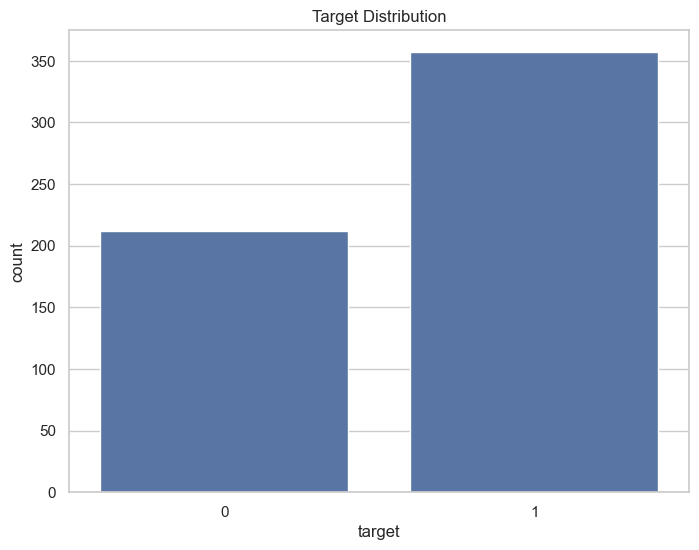

In [39]:
# Check target distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title("Target Distribution")
plt.show()


In [40]:
X, y = data.data, data.target
feature_names = data.feature_names

print("Dataset Shape:", X.shape)
print("Features:", feature_names[:5], "...")
print("Target classes:", data.target_names)

Dataset Shape: (569, 30)
Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness'] ...
Target classes: ['malignant' 'benign']


# Train / Test Split

In [41]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=23)

## Train Logistic Regression Model

In [42]:
clf = LogisticRegression(max_iter = 10000, random_state=0)
clf.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [43]:
y_pred = clf.predict(X_test)

### Checking accuracy of the model

In [44]:
acc = accuracy_score(y_test, y_pred) * 100
print(f"\nLogistic Regression Model Accuracy: {acc:.2f}%")



Logistic Regression Model Accuracy: 96.49%


### Confusion Matrix

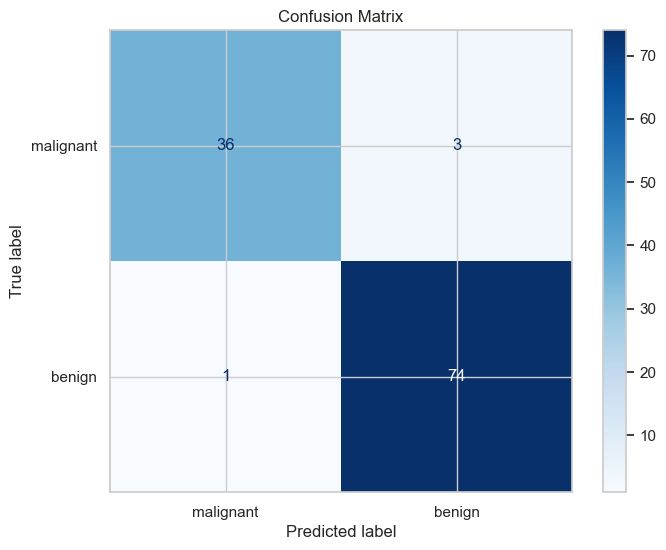

In [45]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Classification Report

In [46]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))



Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.92      0.95        39
      benign       0.96      0.99      0.97        75

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



## Feature Importance ( Coefficients )

In [47]:
coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": clf.coef_[0]})
coef_df = coef_df.sort_values(by="Coefficient", key=abs, ascending=False)
print("\nTop 10 Important Features:")
print(coef_df.head(10))


Top 10 Important Features:
                 Feature  Coefficient
11         texture error     1.494834
26       worst concavity    -1.414572
0            mean radius     1.125264
28        worst symmetry    -0.715175
25     worst compactness    -0.696270
27  worst concave points    -0.575360
6         mean concavity    -0.533645
21         worst texture    -0.424387
24      worst smoothness    -0.338936
2         mean perimeter    -0.282115


## Visualize top 10 features

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2876\3356811149.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10), palette="viridis")


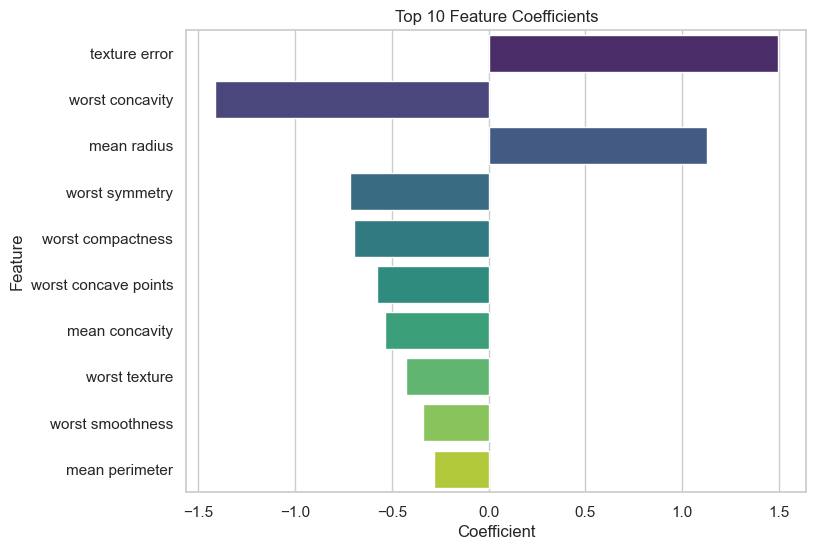

In [48]:
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10), palette="viridis")
plt.title("Top 10 Feature Coefficients")
plt.show()

## Conclusion

In this mini project, a Logistic Regression classifier was trained to distinguish between malignant and benign tumors.

The model achieved an accuracy of around 96.4%, showing high predictive performance.

The confusion matrix and classification report provided insights into true and false predictions.

Analysis of feature coefficients highlighted which features have the most influence on predictions.

This beginner-friendly project illustrates the complete machine learning workflow: loading data, preprocessing (splitting), training a model, evaluating performance, and interpreting results.